<a href="https://colab.research.google.com/github/tomjoyce1/obesity/blob/Development/naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [6]:
#Import dataset
df = pd.read_csv('ObesityDataSet.csv')

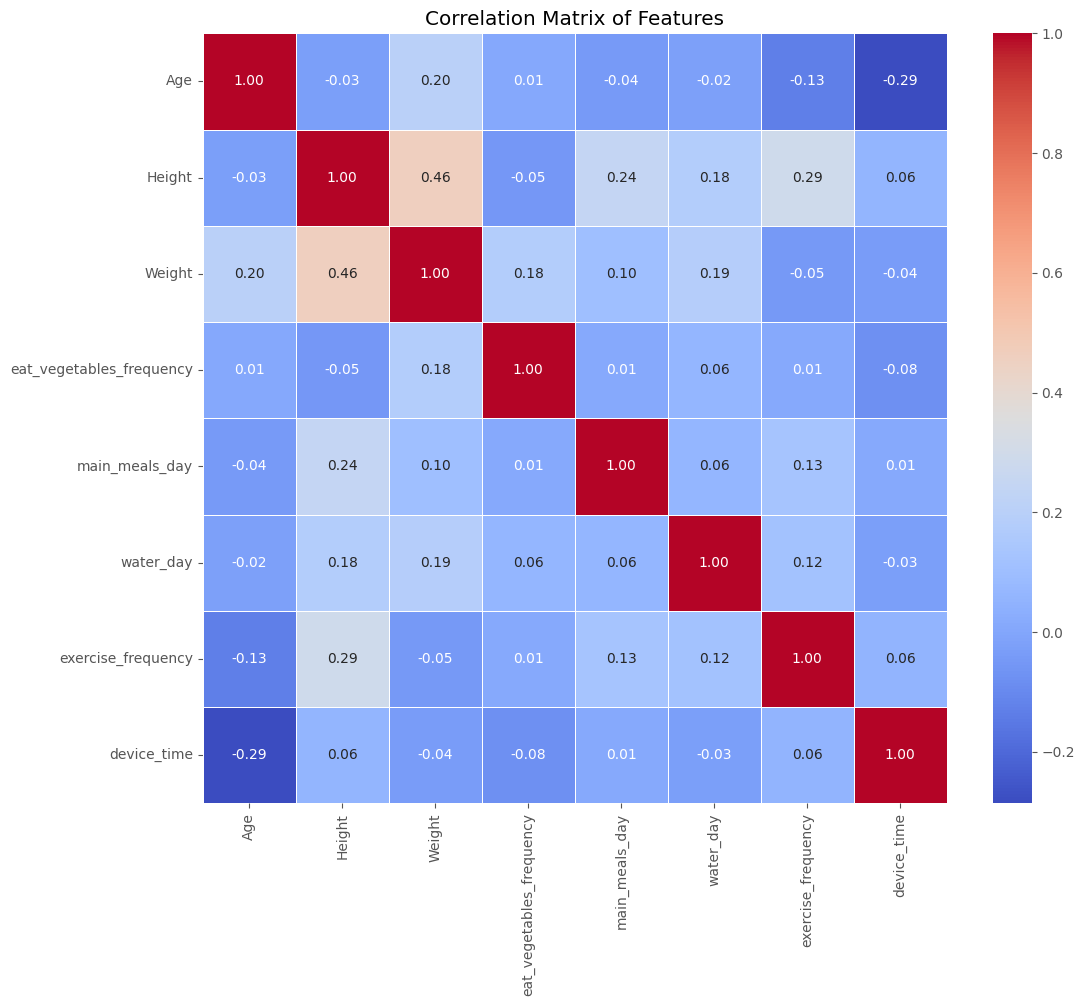

In [7]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

In [8]:
# Preprocess data
# Here we are dropping unrelated features, and features that are related to each other, as Naive Bayes assumes feature independence.
X = df.drop(columns=['obese_category', 'Gender', 'water_day', 'smoke', 'transport_mode'])
y = df['obese_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [9]:
#Mappings for categorical variables
target_mapping = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}
X['BMI'] = X['Weight']/(X['Height']**2)

X.reset_index(drop=True, inplace=True)

In [10]:
#Remove outliers using Z-Scores
mean = X.mean()
std = X.std()

lower_bound = mean - 3 * std
upper_bound = mean + 3 * std

cleaned_X = X[(X >= lower_bound) & (X <= upper_bound)]

In [11]:
#Encode and Split dataset
X_encoded = pd.get_dummies(X, drop_first=True)
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y, test_size=0.1, random_state=42)

In [12]:
#Initialize and fit Naive Bayes model
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_encoded, y_train_encoded)

GaussianNB()

In [13]:
#Prediction
y_pred_encoded = naive_bayes.predict(X_test_encoded)

In [14]:
#Display Results
accuracy_encoded = accuracy_score(y_test_encoded, y_pred_encoded)
print("Accuracy (with one-hot encoding):", accuracy_encoded)
print(classification_report(y_test_encoded, y_pred_encoded))

Accuracy (with one-hot encoding): 0.8254716981132075
                     precision    recall  f1-score   support

Insufficient_Weight       0.84      1.00      0.91        31
      Normal_Weight       0.81      0.71      0.76        35
     Obesity_Type_I       0.89      0.84      0.86        38
    Obesity_Type_II       0.96      0.77      0.86        35
   Obesity_Type_III       0.70      1.00      0.82        30
 Overweight_Level_I       0.78      0.64      0.70        22
Overweight_Level_II       0.84      0.76      0.80        21

           accuracy                           0.83       212
          macro avg       0.83      0.82      0.82       212
       weighted avg       0.84      0.83      0.82       212

